In [51]:
import json

def process_tmdb_file(file_path):
#     actor_dict = {}
    poss_list = []
    weight_list = []
    relation_list = json.load(open(file_path))
    for relation in relation_list:
        # print(len(relation_list))
        weight = relation['popularity']
        risk = relation['possibility']
        poss_list.append(risk)
        weight_list.append(weight)
    return weight_list,poss_list


def process_PPI_file(file_path):
#     author_dict = {}
    poss_list = []
    weight_list = []
    relation_list = json.load(open(file_path))
    for relation in relation_list:
        weight = relation['weight']
        possibility = relation['possibility']
        poss_list.append(possibility)
        weight_list.append(weight)
    return weight_list,poss_list


In [52]:
import matplotlib.pyplot as plt
import math


def weight_hist(file_name, poss_list, plot_type, step = 0.01, max_value=50):
# hist for probability
    plt.xlabel('Weight')
    plt.ylabel('Count')
    plt.title("Linear histogram of weights")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    range_list = []
    for i in range(0,max_value+1):
        range_list.append(step*i)
    plt.hist(poss_list, bins=range_list)
    plt.savefig("plot/"+file_name.split(".")[0] + "hist_"+plot_type+".jpg", bbox_inches='tight')
    plt.show()

def log_weight_hist(file_name, poss_list, plot_type, step = 0.01, max_value=50):
# log hist for probability
    plt.xlabel('Weight')
    plt.ylabel('Log count')
    plt.title("Log histogram of weights")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    range_list = []
    for i in range(0,max_value+1):
        range_list.append(step*i)
    plt.hist(poss_list, log=True,bins=range_list)
    plt.savefig("plot/"+file_name.split(".")[0] + "log_hist_"+plot_type+".jpg", bbox_inches='tight')
    plt.show()

def loglog_weight_hist(file_name, poss_list, plot_type, step = 0.01, max_value=50):
# log log hist for probability
    plt.xlabel('Log weight')
    plt.ylabel('Log count')
    plt.title("Log log histogram of weights")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    range_list = []
    for i in range(0,max_value+1):
        range_list.append(step*i)
    plt.hist(np.log2(np.array(poss_list)), log=True,bins=range_list)
    plt.savefig("plot/"+file_name.split(".")[0] + "loglog_hist_"+plot_type+".jpg", bbox_inches='tight')
    plt.show()

def prob_hist(file_name, poss_list, plot_type, step = 0.01, max_value=50):
# hist for probability
    plt.xlabel('Probability')
    plt.ylabel('Count')
    plt.title("Linear histogram of probabilities")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    range_list = []
    for i in range(0,max_value+1):
        range_list.append(step*i)
    plt.hist(poss_list, bins=range_list)
    plt.savefig("plot/"+file_name.split(".")[0] + "hist_"+plot_type+".jpg", bbox_inches='tight')
    plt.show()

def log_prob_hist(file_name, poss_list, plot_type, step = 0.01, max_value=50):
# log hist for probability
    plt.xlabel('Probability')
    plt.ylabel('Log count')
    plt.title("Log histogram of probabilities")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    range_list = []
    for i in range(0,max_value+1):
        range_list.append(step*i)
    plt.hist(poss_list, log=True,bins=range_list)
    plt.savefig("plot/"+file_name.split(".")[0] + "log_hist_"+plot_type+".jpg", bbox_inches='tight')
    plt.show()

def loglog_prob_hist(file_name, poss_list, plot_type, step = 0.01, max_value=50):
# log log hist for probability
    plt.xlabel('Log probability')
    plt.ylabel('Log count')
    plt.title("Log log histogram of probabilities")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    range_list = []
    for i in range(0,max_value+1):
        range_list.append(step*i)
    plt.hist(np.log2(np.array(poss_list)), log=True,bins=range_list)
    plt.savefig("plot/"+file_name.split(".")[0] + "loglog_hist_"+plot_type+".jpg", bbox_inches='tight')
    plt.show()

def plot_prob(file_name, poss_list):
    
    prob_hist(file_name, poss_list, "probability", max_value=math.ceil(100*max(poss_list)))
    log_prob_hist(file_name, poss_list, "probability", max_value=math.ceil(100*max(poss_list)))
    loglog_prob_hist(file_name, poss_list, "probability", max_value=math.ceil(100*max(poss_list)))
    
def plot_weight(file_name, poss_list, step=0.01):
    weight_hist(file_name, poss_list, "weight", step=step, max_value=math.ceil(max(poss_list)/step))
    log_weight_hist(file_name, poss_list, "weight", step=step, max_value=math.ceil(max(poss_list)/step))
    loglog_weight_hist(file_name, poss_list, "weight", step=step, max_value=math.ceil(max(poss_list)/step))
    
def plot_scatter(file_name, poss_list, weight_list):
    plt.xlabel('probability')
    plt.ylabel('Weight')
    plt.title("Scatter plot of probabilities and weights")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.scatter(poss_list,weight_list)
    plt.savefig("plot/"+file_name.split(".")[0] + "scatter.jpg", bbox_inches='tight')
    plt.show()

def plot(file):
    weight_list,poss_list = process_PPI_file(file)
    # weight_list,poss_list = process_tmdb_file("biogrid_yeast_physical_unweighted.json")
    plot_prob(file,poss_list)
    plot_weight(file,weight_list)
    plot_scatter(file,poss_list,weight_list)

plots for PPI datasets. 

/Users/tony/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


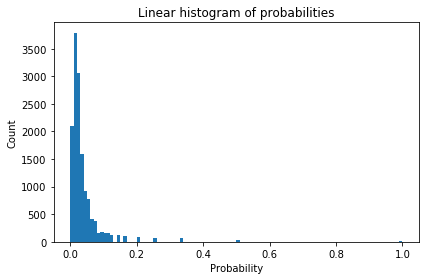

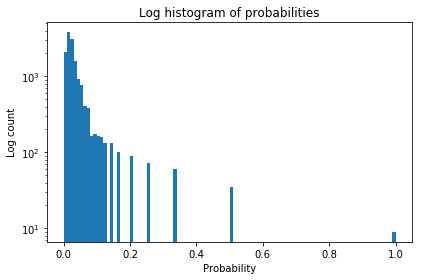

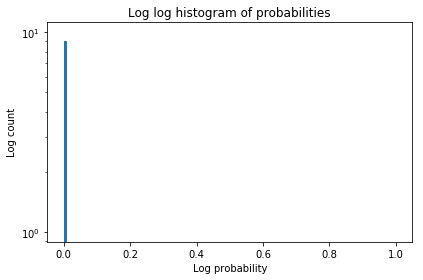

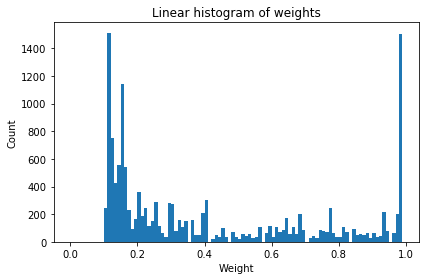

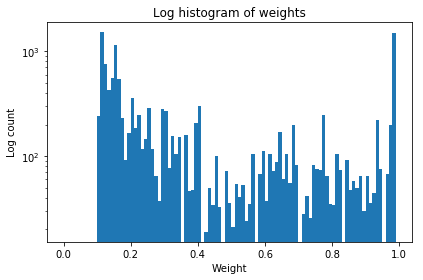

/Users/tony/anaconda/lib/python3.6/site-packages/matplotlib/ticker.py:2039: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


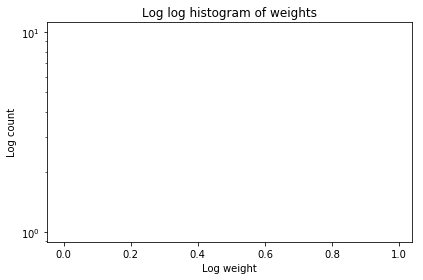

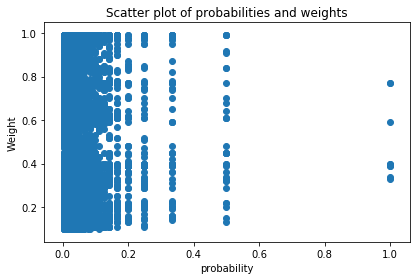

In [43]:

plot("krogan2006_extended.json")

plots for tmdb dataset

/Users/tony/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


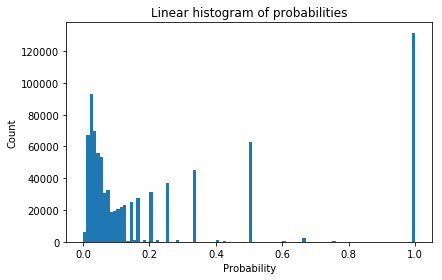

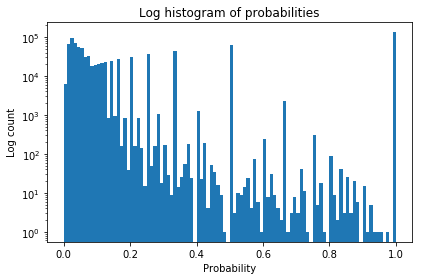

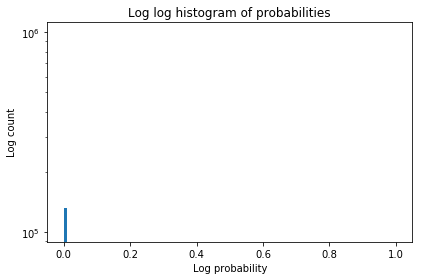

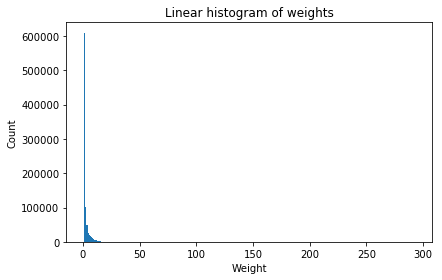

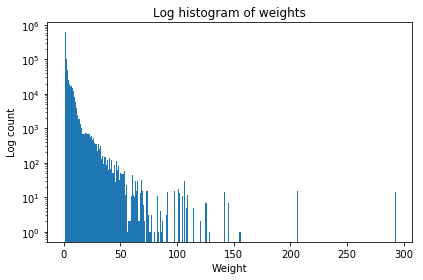

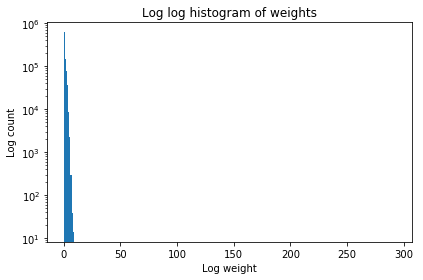

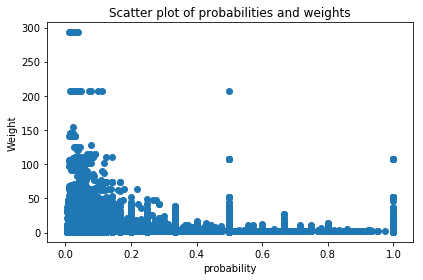

In [50]:
path = "../USMovieSince2017.json"
weight_list,poss_list = process_tmdb_file(path)
    # weight_list,poss_list = process_tmdb_file("biogrid_yeast_physical_unweighted.json")
plot_prob("tmdb",poss_list)
plot_weight("tmdb",weight_list,1)
plot_scatter("tmdb",poss_list,weight_list)